# Figueroa probe set vbsr

In [209]:
library(vbsr)
library(dplyr)
library(qvalue)
source('../R/regressionModel/regressionModel.R')

In [69]:
Figueroa.methyl <- read.csv('../data//Figueroa/CC/colMedian/clustering.tsv',
                          stringsAsFactor=F, sep='\t', header=F)

In [70]:
methyl <- data.matrix(Figueroa.methyl[-1,-1])

rownames(methyl) <- Figueroa.methyl[-1,1]
colnames(methyl) <- Figueroa.methyl[1,-dim(Figueroa.methyl)[2]]

head(methyl)

table(methyl[,dim(methyl)[2]]) # number of probes in each cluster

,GSM464771,GSM464772,GSM464773,GSM464774,GSM464775,GSM464776,GSM464777,GSM464778,GSM464779,GSM464780,⋯,GSM465024,GSM465026,GSM465030,GSM465060,GSM465061,GSM465062,GSM465063,GSM465064,GSM465065,cluster
NOS3,-0.3209221,0.7437331,-1.5865591,1.43625353,-0.4031192,1.765125372,0.7718629,-0.2769187,0.7151102,1.0123317,⋯,0.54174322,-1.1299481,-0.64560186,-1.2421254,0.8268533,-0.5899965,-0.9209174,1.9426029,0.5576303,1
PARD6G,0.3551100,0.3424429,0.9017973,0.84926965,-1.7860586,0.353445459,-0.4209320,0.3641028,1.0927540,-0.9108578,⋯,-0.81422614,1.1276748,1.21794685,-0.8847018,0.9783142,0.9088513,1.4464112,1.3375741,-1.2193434,2
KIAA0907,1.8234191,2.1386032,-0.8755142,-0.93036959,-0.1365872,-1.104376130,0.4257712,1.4942379,-1.2211644,-1.0183642,⋯,-0.51772396,-0.9785800,1.63105411,-0.3217321,-0.7442774,-0.5381888,-0.7619262,-0.6688182,-1.4549071,3
SFT2D1,-0.1004879,0.8094989,-0.1174298,-0.13667581,3.9679122,-0.335297403,1.2823675,-0.3365721,-0.4289103,-0.1761355,⋯,-0.58892600,3.4251268,-1.07620369,-0.9455238,1.0592592,-0.6951691,-0.6229474,-0.2797164,-0.8508921,4
RAP2A,1.1020036,0.7394512,-0.8559291,1.62629080,0.5632572,-0.002808636,-1.3797497,-0.3630356,-0.8098417,1.0629036,⋯,0.93830516,0.8038830,0.04733865,0.4180303,-1.2079620,-1.2646654,1.0822027,1.2481446,-1.0228727,5
ITGA8,-0.2802714,1.5679925,-0.4480782,-0.08721108,-0.5202001,-1.066512938,1.8082233,-0.8247764,1.6403075,0.1204026,⋯,0.08429282,-0.5340413,1.89371705,-0.8092779,-0.8797858,-0.6311369,1.2633502,-0.5002683,-1.0485098,6



  1   2   3   4   5   6   7 
326 290 671 525 816 656 461 

In [71]:
findClusterIdx <- function(i) {
    n <- dim(methyl)[2]
    which(methyl[,n] == i)
}

computeAverage <- function(idx) {
    n <- dim(methyl)[2]
    cluster.probes <- methyl[idx, -n]
    cbind(apply(cluster.probes, 2, mean), apply(cluster.probes, 2, sd))
}

# preprocessing RNAseq data

In [72]:
# load the RNAseq data
rnaseq.raw <- read.csv('../data/Figueroa/rnaseq.tsv', sep='\t', stringsAsFactor=F, header=F)

rnaseq <- data.matrix(rnaseq.raw[-1, -1])
colnames(rnaseq) <- rnaseq.raw[1, -dim(rnaseq.raw)[2]]
rownames(rnaseq) <- rnaseq.raw[-1, 1]

In [73]:
head(rnaseq)  # predictors

,GSM464771,GSM464772,GSM464773,GSM464774,GSM464775,GSM464776,GSM464777,GSM464778,GSM464779,GSM464780,⋯,GSM465020,GSM465024,GSM465026,GSM465030,GSM465060,GSM465061,GSM465062,GSM465063,GSM465064,GSM465065
MED6,660.56974,536.18860,314.06915,856.60955,708.81936,433.50528,528.43526,448.2595,543.2180,707.80086,⋯,406.98144,586.14302,410.51695,486.99356,547.82721,587.26037,549.84944,398.54022,457.63892,384.29063
NR2E3,84.34185,56.78113,45.26591,174.51750,70.79560,82.05186,73.81927,142.9044,122.1829,144.36776,⋯,75.13807,71.23044,25.49023,54.55764,49.45993,113.59767,52.31265,83.31183,34.09275,52.96940
ZBTB33,1060.79305,596.17613,443.87567,1190.02471,1261.04240,695.02429,994.92703,725.0389,806.3498,846.59995,⋯,939.38803,1238.60655,638.92057,990.12739,649.39378,1186.24832,996.09131,941.10275,928.10878,779.57045
SRA1,197.67505,69.23700,435.99979,332.36297,77.25411,418.57888,225.90877,194.9194,166.0588,442.73545,⋯,102.28652,203.92157,981.19022,514.58452,474.32831,367.67276,242.61262,729.51343,496.60389,764.26749
ZBTB42,90.91652,200.74195,38.22230,39.48965,65.72948,125.12272,84.36747,332.5280,101.5288,51.93689,⋯,170.28814,132.65723,172.23979,17.54705,32.44631,44.31777,114.34563,51.93390,97.79446,49.13489
ZNF316,604.98337,700.86450,605.96999,749.42574,775.11273,391.61254,399.32609,285.5689,597.9074,628.15264,⋯,437.72630,341.85076,442.54547,227.47432,256.29757,327.74557,326.22713,403.71416,304.94500,160.36429


In [74]:
# select 75 % / 25 % split
set.seed(1)
train.idx <- sample(colnames(rnaseq), round(dim(rnaseq)[2] * 0.75, 0))

rnaseq.train <- rnaseq[, colnames(rnaseq) %in% train.idx]

In [199]:
findIdx <- function(gene) {
    which(rownames(rnaseq) %in% gene)
}
FindIdx <- Vectorize(findIdx)

n <- dim(methyl)[2]
plotCluster <- function(i, filename=NULL, tablename=NULL) {
    set.seed(1)
    idx <- findClusterIdx(i)
    cluster.probes <- methyl[idx, -n]
    cluster.mean <- computeAverage(findClusterIdx(i))
    model.fit <- vbsr(y=cluster.mean, X=t(rnaseq), family='normal', eps=5e-15, n_orderings=100, maxit=10^4, estimation_type="BMA", post=0.95) # 100 random starts
    p.val <- model.fit$pval
    significant.idx <- qvalue(p.val, fdr.level=0.05)$significant
    coef.names <- rownames(rnaseq.train)[significant.idx]
    coef.significant <- model.fit$beta[significant.idx]
    res <- data.frame(gene=coef.names, coef=coef.significant)
    ModuleHeatmap(t(cluster.probes), cluster.mean[,1], t(rnaseq[as.numeric(FindIdx(res$gene)), ]), center=T, scale=T, coef=sign(res$coef),
                      filename=filename)
    if(!is.null(tablename)) {
        write.table(res, file=tablename, quote=F, sep='\t', row.names=F, col.names=F)
        print(paste0('Table saved at ', tablename))
    }
    return(res)
}

In [211]:
for (i in seq(7)) {
    plotCluster(i, filename=paste0('../data/Figueroa/vBsr/cluster', i, '.pdf'), 
                      tablename=paste0('../data/Figueroa/vBsr/cluster', i, '.tsv'))
}

[1] "Image saved as ../data/Figueroa/vBsr/cluster1.pdf"
[1] "Table saved at ../data/Figueroa/vBsr/cluster1.tsv"
[1] "Image saved as ../data/Figueroa/vBsr/cluster2.pdf"
[1] "Table saved at ../data/Figueroa/vBsr/cluster2.tsv"
Maximum iterations exceeded!
[1] "Image saved as ../data/Figueroa/vBsr/cluster3.pdf"
[1] "Table saved at ../data/Figueroa/vBsr/cluster3.tsv"
[1] "Image saved as ../data/Figueroa/vBsr/cluster4.pdf"
[1] "Table saved at ../data/Figueroa/vBsr/cluster4.tsv"
[1] "Image saved as ../data/Figueroa/vBsr/cluster5.pdf"
[1] "Table saved at ../data/Figueroa/vBsr/cluster5.tsv"
[1] "Image saved as ../data/Figueroa/vBsr/cluster6.pdf"
[1] "Table saved at ../data/Figueroa/vBsr/cluster6.tsv"
[1] "Image saved as ../data/Figueroa/vBsr/cluster7.pdf"
[1] "Table saved at ../data/Figueroa/vBsr/cluster7.tsv"


gene,coef
ERBB2,0.0019639406
ZBTB38,-0.0006798693
HDAC2,0.0005915044
RBPJ,-0.0001908527
POU6F1,0.0022598028
TAL1,0.0001956243
CDCA7,-0.0001492050
AURKB,0.0004025197


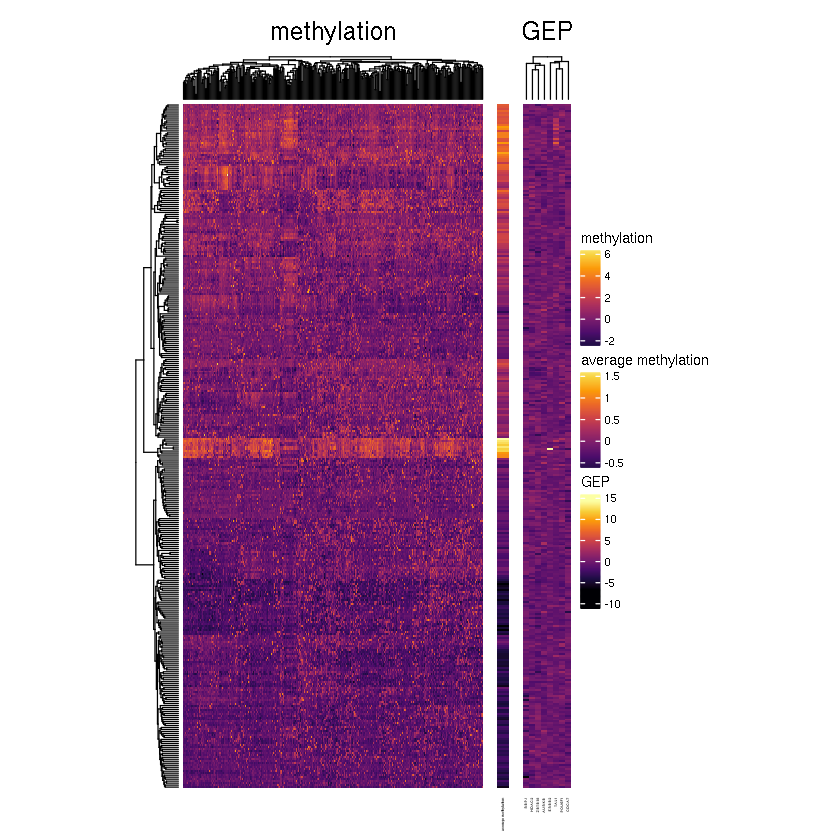

In [206]:
plotCluster(1)

gene,coef
ZNF383,0.0010913149
UTP3,-0.0002548433
NPAS3,0.0033368249
ZXDC,-0.0003891581


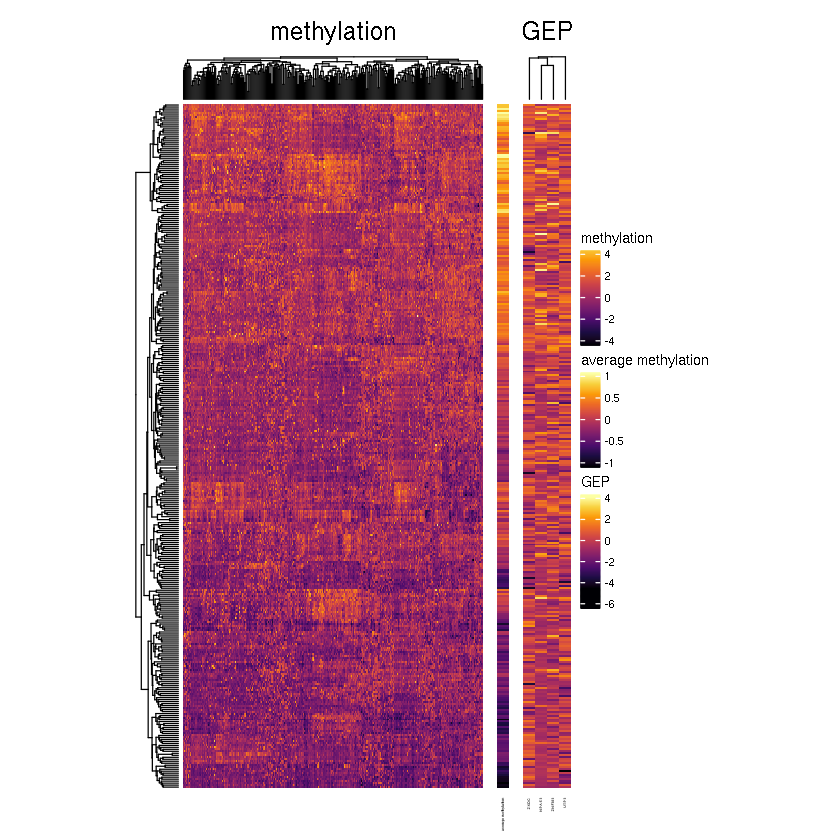

In [212]:
plotCluster(2)

Maximum iterations exceeded!


gene,coef
MED13L,-1.532150e-04
INTS6,-2.115602e-04
MGMT,6.048323e-04
SOX15,7.078394e-04
TRAF7,2.754883e-04
ABHD14B,-1.165613e-04
PDLIM1,1.060524e-05
ZMYM4,1.833645e-04


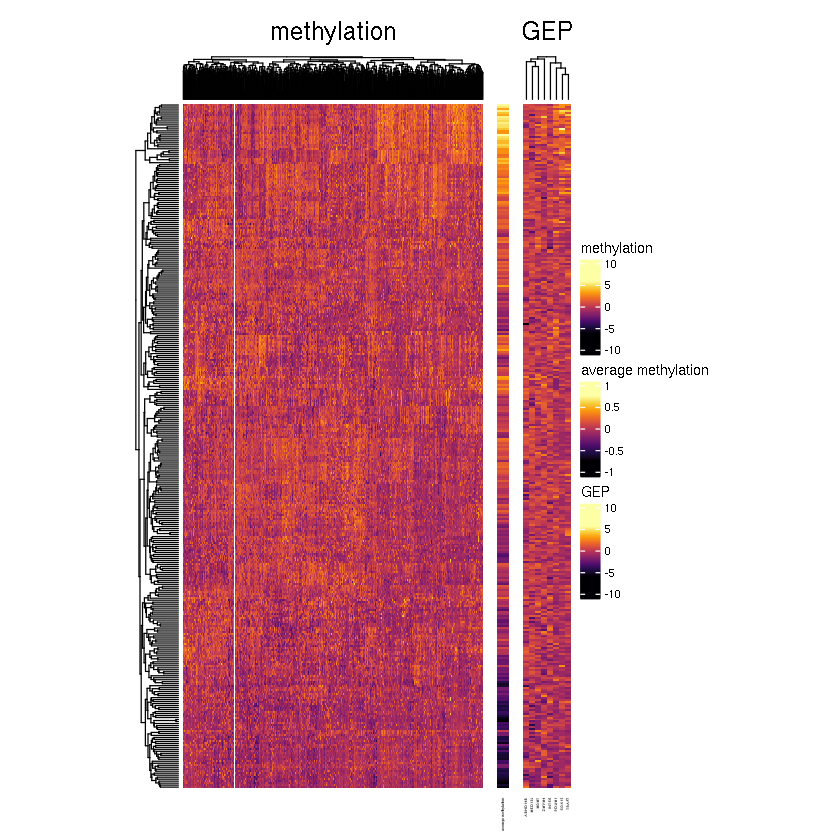

In [213]:
plotCluster(3)

gene,coef
SSU72,-1.973974e-04
JUP,-6.412990e-05
PCBD1,3.969084e-04
MKL1,-4.643668e-04
BCL7A,-1.004261e-04
CD81,4.131343e-05


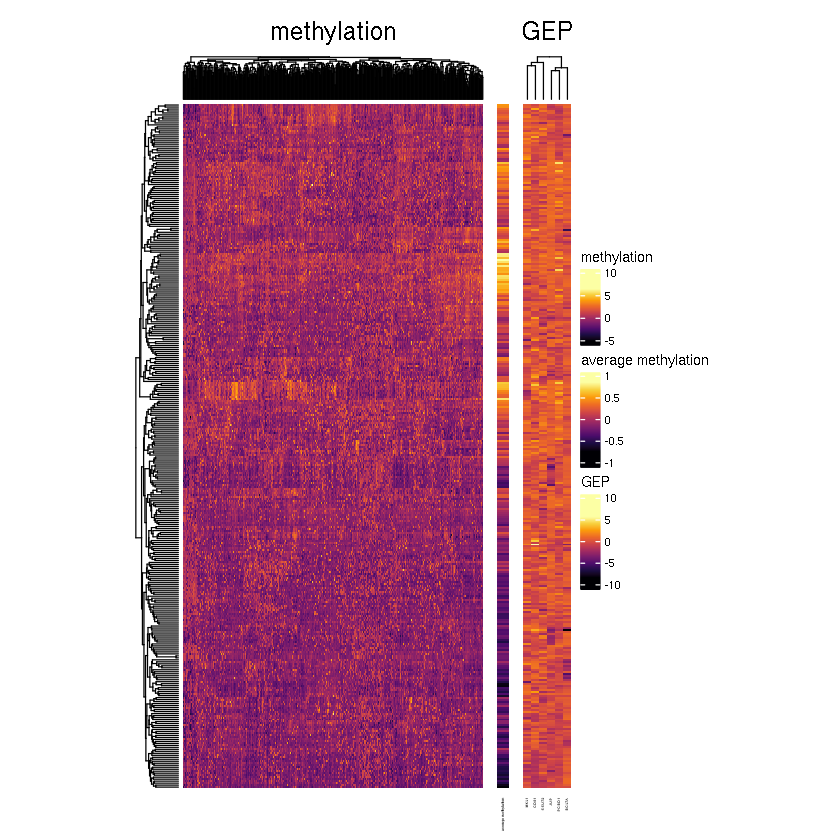

In [214]:
plotCluster(4)

  gene          coef
1 GFI1 -1.445155e-04
2 SARS -3.159663e-04
3 SFPQ -7.287101e-05
4  CD4 -8.603863e-05


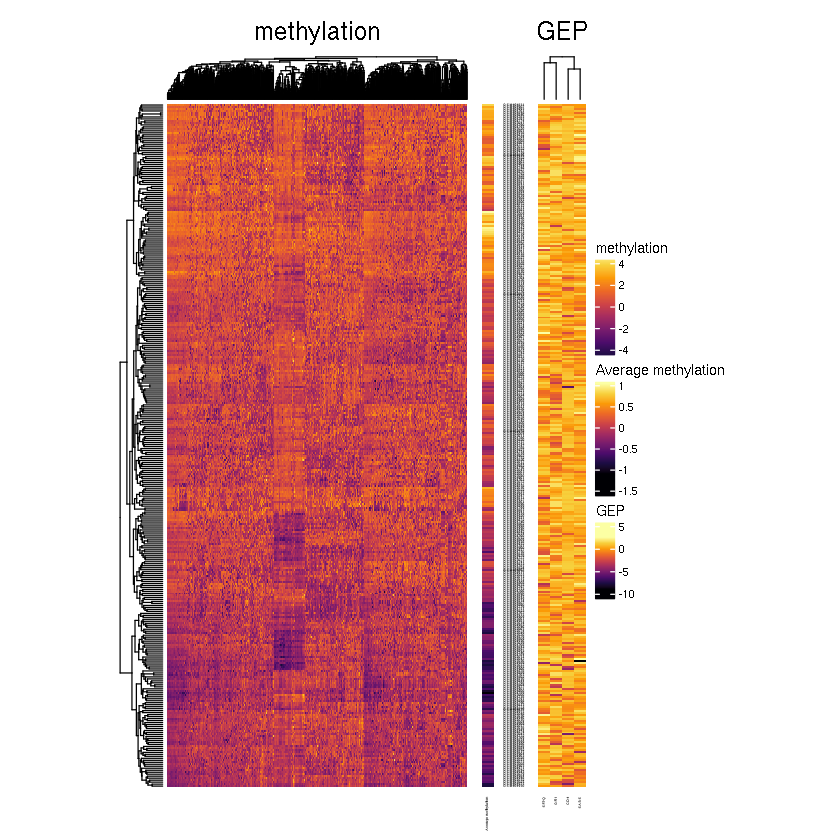

In [17]:
plotCluster(5)

     gene          coef
1     APP  4.673387e-05
2   PSEN1 -2.012071e-04
3  CREBZF  6.049441e-04
4    RBL2  2.538649e-04
5 RPS6KA1  1.265944e-04
6   VLDLR -1.123599e-04
7   ZC3H8 -5.372823e-04
8  ZNF592 -3.223382e-04


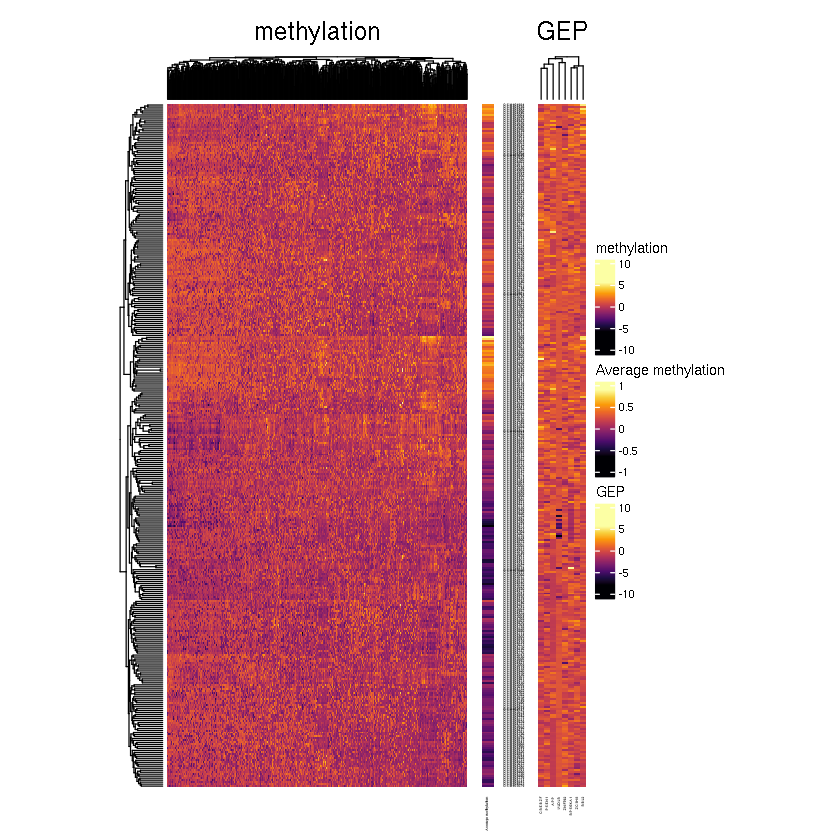

In [18]:
plotCluster(6)

      gene          coef
1     AKT1  0.0001746287
2     GFI1  0.0001243257
3     HNMT  0.0010305553
4   POLR3B  0.0004349346
5     PAK6  0.0006374421
6  ZNF286A -0.0070726863
7    ZBED5 -0.0003300262
8    SCML1 -0.0009945907
9    CRTC3 -0.0001468687
10 SLC11A1  0.0004451627
11 TP53BP1  0.0006735632
12    CBX2 -0.0008708909


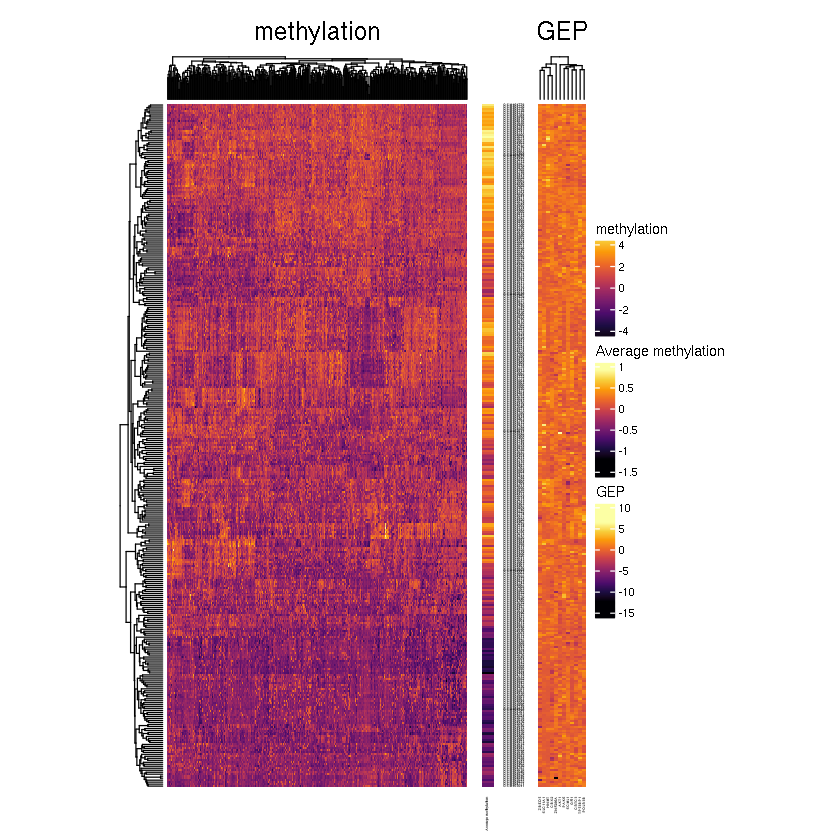

In [19]:
plotCluster(7)

# Methylation cluster gene set enrichment analysis using PANTHER

In [20]:
cluster.membership <- HM27[, n]
gene.cluster <- list()
for (i in seq(length(unique(cluster.membership)))) {
    cluster.idx <- which(cluster.membership == i)
    print(paste0('Cluster ', i, ' has ', length(cluster.idx), ' probes.'))
    gene.cluster[[i]] <- rownames(HM27)[cluster.idx]
}

[1] "Cluster 1 has 326 probes."
[1] "Cluster 2 has 290 probes."
[1] "Cluster 3 has 671 probes."
[1] "Cluster 4 has 525 probes."
[1] "Cluster 5 has 816 probes."
[1] "Cluster 6 has 656 probes."
[1] "Cluster 7 has 461 probes."


In [21]:
extractUniqueGenes <- function(genes) { 
    unique(unlist(sapply(genes, function(x) strsplit(x, split=';')[[1]])))
}

for (i in seq(unique(cluster.membership))) {
    write.table(extractUniqueGenes(gene.cluster[[i]]), file=paste0('../data/Figueroa/HELP/cluster', i, '.tsv'), row.names=F, col.names=F, quote=F)
}

gene set enrichment analysis is obtained using PANTHER classification system on [GOC](http://geneontology.org)

In [ ]:
cluster1 <- read.csv('../data/Figueroa/HELP/cluster1.txt', skip=5, header=T, sep='\t', stringsAsFactor=F)

no significant result for cluster 2

In [35]:
cluster3 <- read.csv('../data/Figueroa/HELP/cluster3.txt', skip=5, header=T, sep='\t', stringsAsFactor=F)

no significant result for cluster 4

In [42]:
cluster5 <- read.csv('../data/Figueroa/HELP/cluster5.txt', skip=5, header=T, sep='\t', stringsAsFactor=F)
cluster6 <- read.csv('../data/Figueroa/HELP/cluster6.txt', skip=5, header=T, sep='\t', stringsAsFactor=F)
cluster7 <- read.csv('../data/Figueroa/HELP/cluster7.txt', skip=5, header=T, sep='\t', stringsAsFactor=F)

Table of concensus clusters

In [47]:
library(xtable)
num.genes <- lapply(gene.cluster, length)

In [ ]:
# genes with similar methylation patterns (why cluster by similar methylation patterns, may be involved in the same biological process)
# those genes with similar gene expression patterns might be regulating the methylation level (if gene expression is high, methylation level is also high)
# would expect genes with similar patterns are involved in some general biological process instead of very specific ones. Rank by intersection will be good.

In [152]:
num.genes[[1]]
colnames(cluster1) <- c('BP', 'ref size', 'intersection', 'expected', '+/-', 'fold enrichment', 'raw P', 'FDR')
table1 <- cluster1 %>%
    arrange(desc(intersection)) %>%
    dplyr::filter(intersection > num.genes[[1]]/4 & FDR < 0.003)
table1
print(xtable(table1[,-5], display=c("s", "s","d","d","f","f","g","g")), include.rownames=FALSE)

[1] 326

BP,ref size,intersection,expected,+/-,fold enrichment,raw P,FDR
cell communication (GO:0007154),5693,97,63.04,+,1.54,1.81e-06,0.00236
signaling (GO:0023052),5578,96,61.77,+,1.55,1.49e-06,0.00233


% latex table generated in R 3.4.0 by xtable 1.8-2 package
% Tue Jun 12 11:35:41 2018
\begin{table}[ht]
\centering
\begin{tabular}{lrrrrrr}
  \hline
BP & ref size & intersection & expected & fold enrichment & raw P & FDR \\ 
  \hline
cell communication (GO:0007154) & 5693 &  97 & 63.04 & 1.54 & 1.8e-06 & 0.0024 \\ 
  signaling (GO:0023052) & 5578 &  96 & 61.77 & 1.55 & 1.5e-06 & 0.0023 \\ 
   \hline
\end{tabular}
\end{table}


In [153]:
num.genes[[5]]
colnames(cluster5) <- c('BP', 'REF size', 'intersection', 'expected', '+/-', 'fold enrichment', 'raw P', 'FDR')
table5 <- cluster5 %>%
    arrange(desc(intersection)) %>%
    dplyr::filter(intersection > num.genes[[5]]/4 & FDR < 1e-10)
table5
print(xtable(table5[,-5], display=c("s", "s","d", "d","f","f","g","g")), include.rownames=FALSE)

[1] 816

BP,REF size,intersection,expected,+/-,fold enrichment,raw P,FDR
developmental process (GO:0032502),5654,310,199.38,+,1.55,9.24e-18,1.45e-13
anatomical structure development (GO:0048856),5299,293,186.86,+,1.57,5.64e-17,4.41e-13
multicellular organism development (GO:0007275),4918,275,173.42,+,1.59,2.73e-16,1.07e-12
system development (GO:0048731),4309,244,151.95,+,1.61,1.01e-14,2.62e-11


% latex table generated in R 3.4.0 by xtable 1.8-2 package
% Tue Jun 12 11:35:50 2018
\begin{table}[ht]
\centering
\begin{tabular}{lrrrrrr}
  \hline
BP & REF size & intersection & expected & fold enrichment & raw P & FDR \\ 
  \hline
developmental process (GO:0032502) & 5654 & 310 & 199.38 & 1.55 & 9.2e-18 & 1.4e-13 \\ 
  anatomical structure development (GO:0048856) & 5299 & 293 & 186.86 & 1.57 & 5.6e-17 & 4.4e-13 \\ 
  multicellular organism development (GO:0007275) & 4918 & 275 & 173.42 & 1.59 & 2.7e-16 & 1.1e-12 \\ 
  system development (GO:0048731) & 4309 & 244 & 151.95 & 1.61 & 1e-14 & 2.6e-11 \\ 
   \hline
\end{tabular}
\end{table}


In [154]:
num.genes[[6]]
colnames(cluster6) <- c('BP', 'REF size', 'intersection', 'expected', '+/-', 'fold enrichment', 'raw P', 'FDR')
table6 <- cluster6 %>%
    arrange(desc(intersection)) %>%
    dplyr::filter(intersection > num.genes[[6]]/4 & FDR < 0.03)
table6
print(xtable(table6[,-5], display=c("s", "s","d", "d","f","f","g","g")), include.rownames=FALSE)

[1] 656

BP,REF size,intersection,expected,+/-,fold enrichment,raw P,FDR
developmental process (GO:0032502),5654,199,147.52,+,1.35,2.20e-06,0.00573
cellular component organization or biogenesis (GO:0071840),5773,196,150.62,+,1.30,3.08e-05,0.02680
cellular component organization (GO:0016043),5584,192,145.69,+,1.32,2.03e-05,0.02110
anatomical structure development (GO:0048856),5299,190,138.25,+,1.37,1.33e-06,0.00520
multicellular organism development (GO:0007275),4918,184,128.31,+,1.43,1.05e-07,0.00165


% latex table generated in R 3.4.0 by xtable 1.8-2 package
% Tue Jun 12 11:36:41 2018
\begin{table}[ht]
\centering
\begin{tabular}{lrrrlrr}
  \hline
BP & REF size & intersection & expected & fold enrichment & raw P & FDR \\ 
  \hline
developmental process (GO:0032502) & 5654 & 199 & 147.52 & 1.35 & 2.2e-06 & 0.0057 \\ 
  cellular component organization or biogenesis (GO:0071840) & 5773 & 196 & 150.62 & 1.30 & 3.1e-05 & 0.027 \\ 
  cellular component organization (GO:0016043) & 5584 & 192 & 145.69 & 1.32 & 2e-05 & 0.021 \\ 
  anatomical structure development (GO:0048856) & 5299 & 190 & 138.25 & 1.37 & 1.3e-06 & 0.0052 \\ 
  multicellular organism development (GO:0007275) & 4918 & 184 & 128.31 & 1.43 & 1.1e-07 & 0.0016 \\ 
   \hline
\end{tabular}
\end{table}


In [158]:
num.genes[[7]]
colnames(cluster7) <- c('BP', 'REF size', 'intersection', 'expected', '+/-', 'fold enrichment', 'raw P', 'FDR')
table7 <- cluster7 %>%
    arrange(desc(intersection)) %>%
    dplyr::filter(intersection > num.genes[[7]]/4 & FDR < 0.015)
print(xtable(table7[,-5], display=c("s", "s","d", "d","f","f","g","g")), include.rownames=F)

[1] 461

% latex table generated in R 3.4.0 by xtable 1.8-2 package
% Tue Jun 12 11:40:11 2018
\begin{table}[ht]
\centering
\begin{tabular}{lrrrrrr}
  \hline
BP & REF size & intersection & expected & fold enrichment & raw P & FDR \\ 
  \hline
negative regulation of biological process (GO:0048519) & 5129 & 132 & 89.21 & 1.48 & 8.2e-07 & 0.013 \\ 
   \hline
\end{tabular}
\end{table}


In [159]:
num.genes[[3]]
colnames(cluster3) <- c('BP', 'REF size', 'intersection', 'expected', '+/-', 'fold enrichment', 'raw P', 'FDR')
table3 <- cluster3 %>%
    arrange(desc(intersection)) %>%
    dplyr::filter(intersection > num.genes[[3]]/4 & FDR < 0.015)
print(xtable(table3[,-5], display=c("s", "s","d", "d","f","f","g","g")), include.rownames=F)

[1] 671

% latex table generated in R 3.4.0 by xtable 1.8-2 package
% Tue Jun 12 11:41:33 2018
\begin{table}[ht]
\centering
\begin{tabular}{lrrrrrr}
  \hline
BP & REF size & intersection & expected & fold enrichment & raw P & FDR \\ 
  \hline
biological\_process (GO:0008150) & 17854 & 480 & 437.82 & 1.10 & 2.9e-08 & 0.00023 \\ 
  cellular process (GO:0009987) & 15478 & 436 & 379.56 & 1.15 & 6.1e-09 & 9.5e-05 \\ 
   \hline
\end{tabular}
\end{table}
